# Manish Mapakshi(015926729)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

import pickle
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [16]:
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [39]:
data = pd.read_csv("dataset_small.csv")

# Data Preprocessing

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


## Using "phishing" feature to find the frequency of both phishing and non-phishing websites value_counts() and countplot() functions

In [41]:
data['phishing'].value_counts()

1    30647
0    27998
Name: phishing, dtype: int64

Text(0.5, 1.0, 'Frequency of Both labels ')

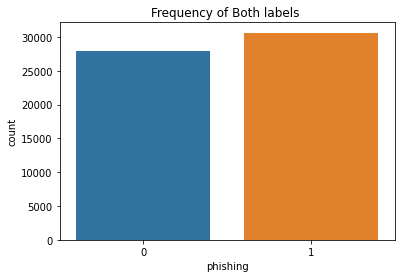

In [42]:
sns.countplot(data['phishing'])
plt.title('Frequency of Both labels ')

In [43]:
print("No of duplicate columns: ",data.duplicated(keep='first').sum())
#dropping duplicate rows
data.drop_duplicates(inplace=True)

No of duplicate columns:  1240


## We are using variance threshold for feature selection. Dropping all the 13 columns which doesn't meet the threshold value.

In [44]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)
var_thres.get_support()
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
print(len(constant_columns))
constant_columns

13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

In [45]:
data = data.drop(constant_columns,axis=1)

## In the cell below, we are checking the percentage of '-1' values present in each and every feature.

In [46]:
missing_data_cols = {}
for col in data.columns:
    values = (data[col].values == -1).sum()
    if not values == 0:
        missing_data_cols[col] = data[col].values
data = data.drop(missing_data_cols,axis= 1)
negative_one_data = pd.DataFrame (missing_data_cols) 

## In the cell below, we are converting the values of '-1' to Nan.


## Checking the columns that has -1 value. -1 value can be considered as a unique category. -1 can be replaced with NaN. We can later find these values using Mean, KNN imputer and MissForest imputer.

In [47]:
def convert_to_nan(data):
    for col in data.columns:
            d = data[col].values
            d = d.astype("float")
            for i in range(len(d)):
                if d[i] == -1.:
                    d[i] = np.nan
            data[col] = d
    return data
negative_one_data = convert_to_nan(negative_one_data)
negative_one_data.isna().sum()  

qty_dot_directory             16519
qty_hyphen_directory          16519
qty_underline_directory       16519
qty_slash_directory           16519
qty_questionmark_directory    16519
                              ...  
qty_ip_resolved                2481
ttl_hostname                   2480
qty_redirects                  4280
url_google_index                  4
domain_google_index               2
Length: 66, dtype: int64

## In the below cell, we are using missing number library to plot missing values. From the figure, we can say that there are a lot of missing params values.

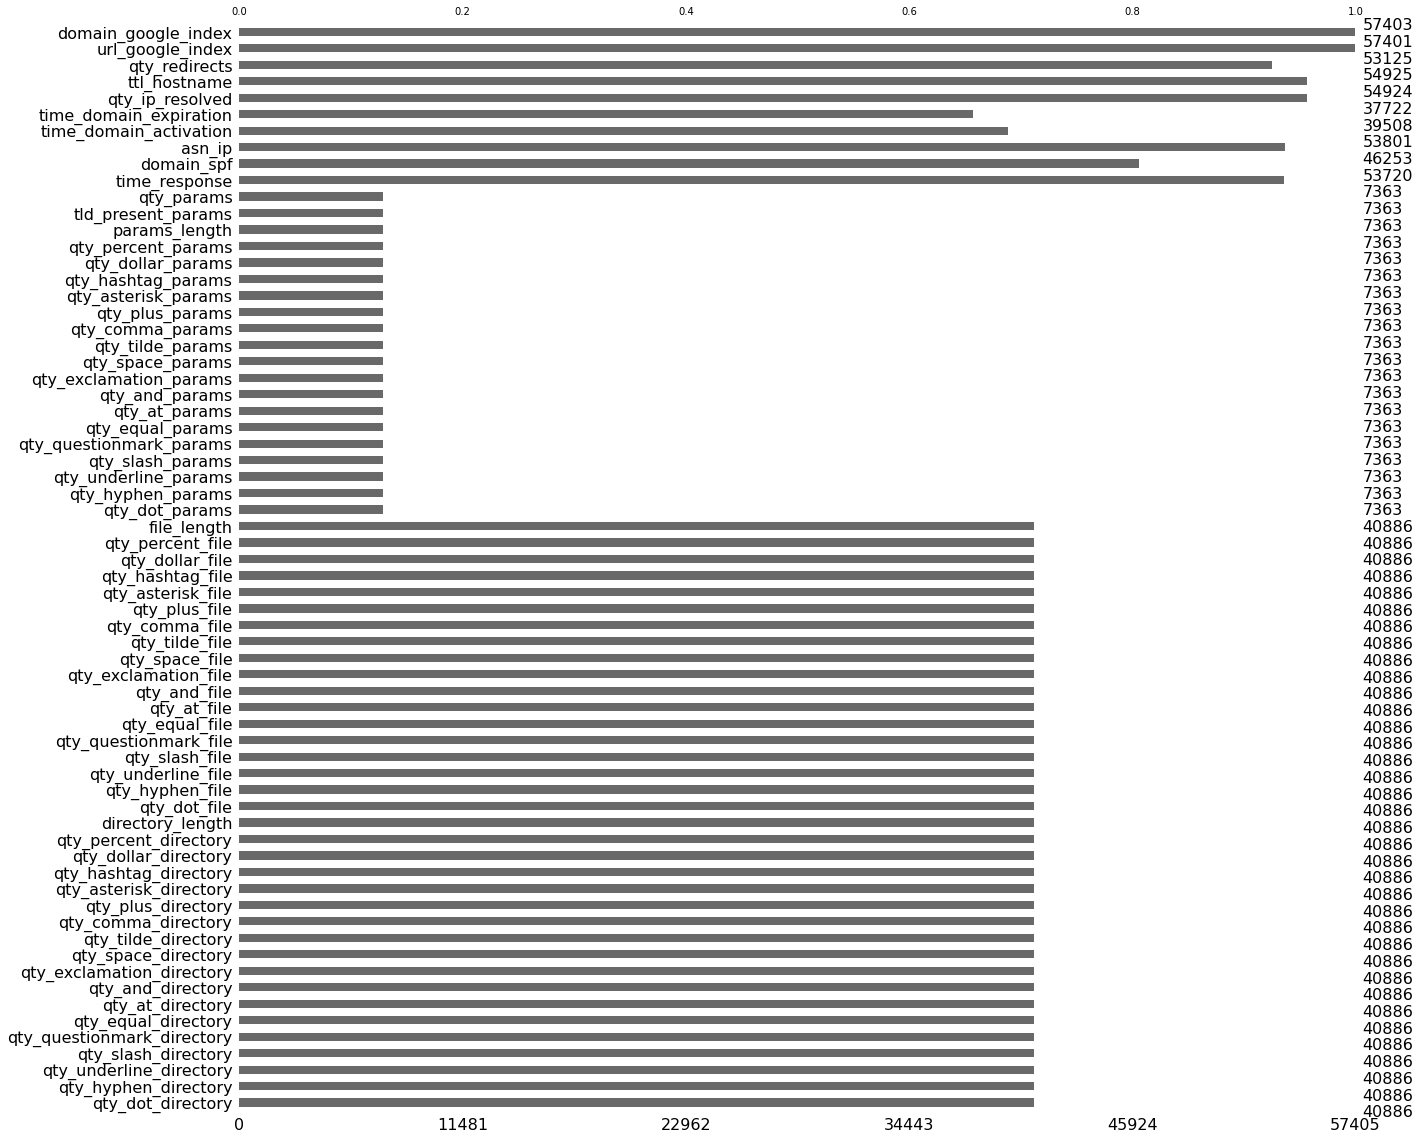

In [48]:
msno.bar(negative_one_data,figsize = (20,20))

## In the cell below, we are plotting a figure to produce heatmap for the missing data.

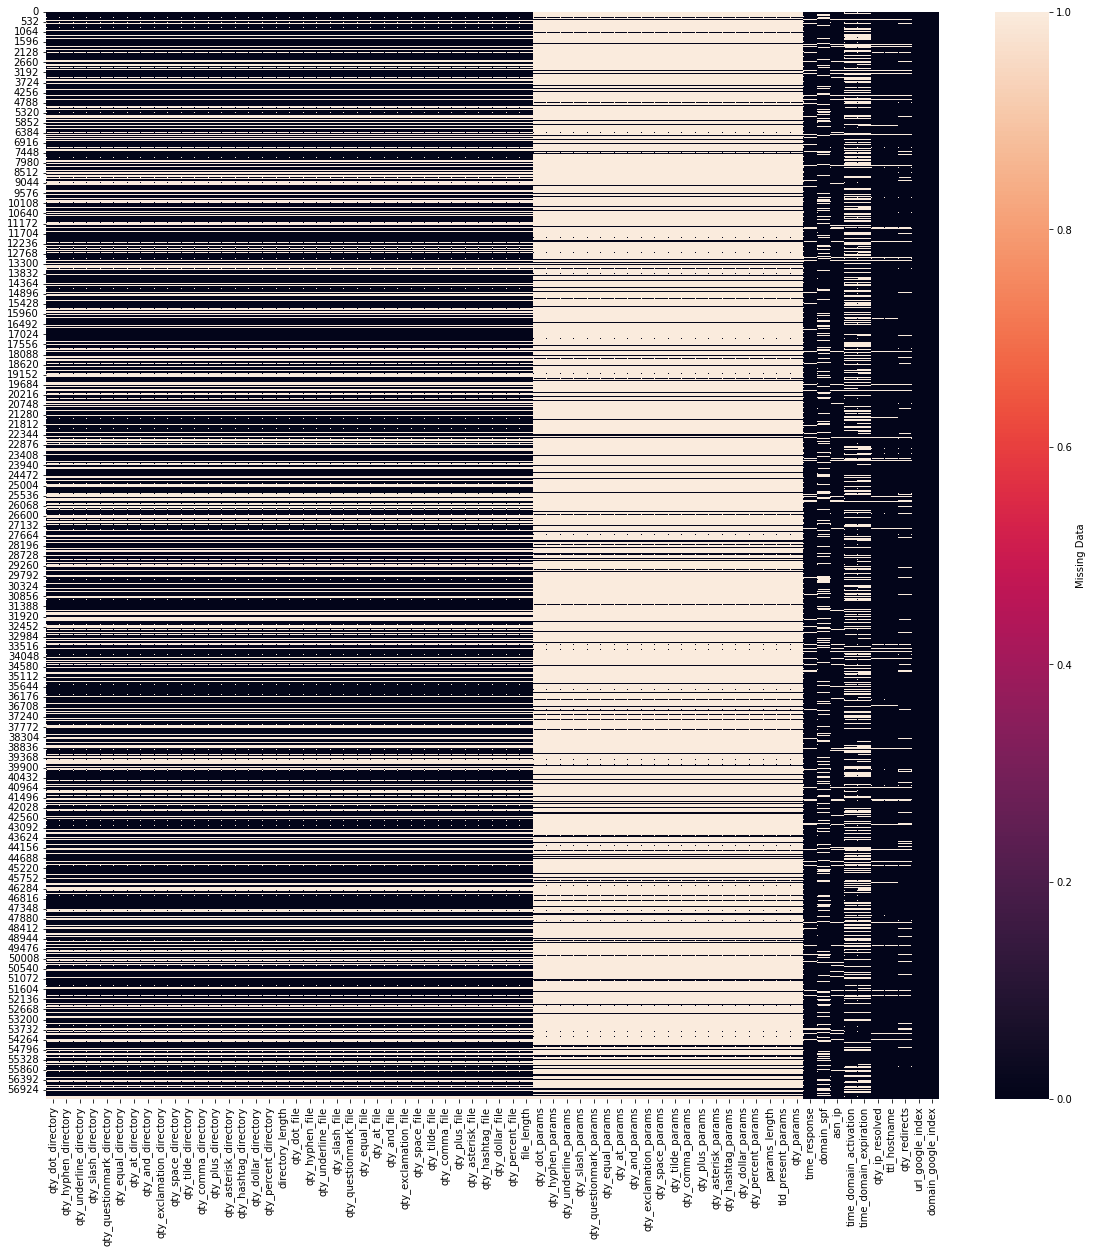

In [49]:
#missing values before imputation
plt.figure(figsize=(20,20))
sns.heatmap(negative_one_data.isna(),cbar_kws={'label':'Missing Data'})

In [50]:
features_to_be_removed = ["qty_dot_params", "qty_hyphen_params", "qty_underline_params",
                                   "qty_slash_params", "qty_questionmark_params",
                                   "qty_equal_params", "qty_at_params", "qty_and_params",
                                   "qty_exclamation_params", "qty_space_params", 
                                   "qty_tilde_params", "qty_comma_params", "qty_plus_params", 
                                   "qty_asterisk_params", "qty_hashtag_params", 
                                   "qty_dollar_params", "qty_percent_params", "params_length",
                                   "tld_present_params", "qty_params"]
negative_one_data = negative_one_data.drop(features_to_be_removed,axis=1)

In [51]:
negative_one_data.shape


(57405, 46)

# Sai Gowtham Ande

> Indented block



# Mean Imputation

# KNN Imputation